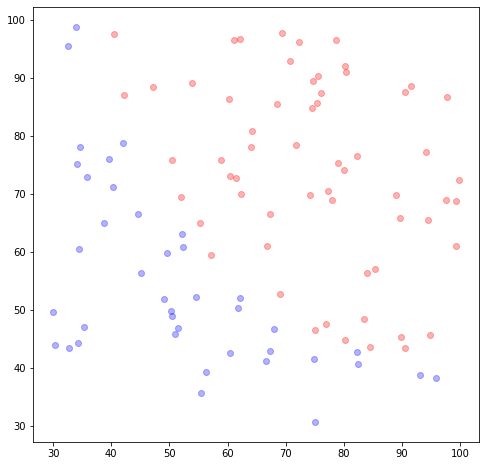

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment05/data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


iter : 10824492
converge


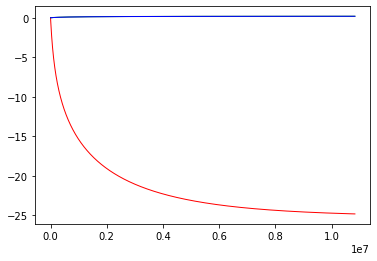

In [2]:
#x, y, label
#세타0, 세타1, 세타2
t0 = 0.0
t1 = 0.0
t2 = 0.0

sigz = 0
J = 0

#error
E = []

t0_list = []
t1_list = []
t2_list = []

sigz_list = []
#0.003까지 /3 단위로 해봤으나 0.1등 너무 큰 값에선 runtime warning : division zero, invalid value 등이 뜨며
#0.003에선 converge하기 위한 threshold값이 너무 빠르게 나오는 것으로 보아 너무 큰 learning rate인 것으로 보인다
a = 0.001

iter = 0
#때에 따라서 0.000001정도는 나오기도 한다. 변화값이 굉장히 다양한 것으로 추정됨
threshold = 0.0000001

while 1:
  z = t0 + t1 * x + t2 * y
  sigz = 1 / (1 + np.exp(-z))
  J = np.mean( -1 * label * np.log(sigz) - (1 - label) * np.log(1 - sigz) )
  tmp0 = t0
  tmp1 = t1
  tmp2 = t2
  t0 = t0 - a * np.mean(sigz - label)
  t1 = t1 - a * np.mean((sigz - label) * x)
  t2 = t2 - a * np.mean((sigz - label) * y)
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  E.append(J)
  if abs(tmp0 - t0) < threshold:
    print("iter : %d" %iter)
    print("converge")
    break
  
  if iter > 20000000:
    print(iter)
    print(tmp0 - t0)
    break
  iter += 1

t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
plt.setp(t0_line, color = 'r', linewidth = 1)
plt.setp(t1_line, color = 'g', linewidth = 1)
plt.setp(t2_line, color = 'b', linewidth = 1)

plt.show()

-24.830738245272475 0.20358741746115527 0.19879653659263


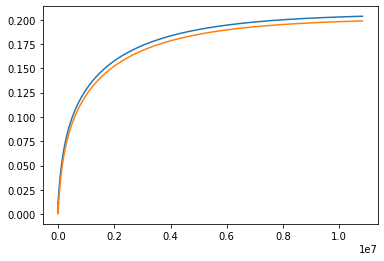

In [3]:
print(t0, t1, t2)
plt.plot(t1_list)
plt.plot(t2_list)
plt.show()

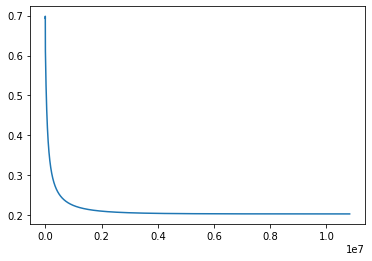

In [4]:
plt.plot(E)
plt.show()

700
0


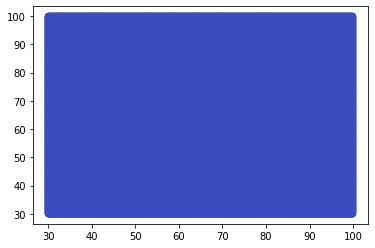

In [8]:
import math
X = np.arange(30, 100, 0.1)
Y = np.arange(30, 100, 0.1)

L = []
L2 = []

x_range = 0
y_range = 0

ttx = 0
sigttx = 0

while x_range < len(X):
  while y_range < len(Y):

    ttx = t0 + t1 * X[x_range] + t1 * Y[y_range] 
    sigtx = 1 / (1 + math.exp(ttx))
    L2.append(sigttx)

    y_range += 1

  L.append(L2)

  x_range += 1
  y_range = 0
  L2 = []

print(x_range)
print(y_range)

X, Y = np.meshgrid(X, Y)

plt.scatter(X, Y, c=L, cmap=plt.cm.coolwarm)
